## Importieren der Bibliotheken für das Modell

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Bildparameter und Klassen

In [15]:
img_height, img_width = 218, 178
num_classes = 5

data_dir = '/home/patrick/Dokumente/Datageneration/dataset/325'
 

## Modell erstellen 

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/home/patrick/Dokumente/Bachelorarbeit/my-venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 216, 176, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 216, 176, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 108, 88, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 106, 86, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 106, 86, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 51, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 51, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 25, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 23, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 23, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 9, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25344)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,976,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,369,541 (51.00 MB)

 Trainable params: 13,368,581 (51.00 MB)

 Non-trainable params: 960 (3.75 KB)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Daten vorbereiten

In [20]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotation um 20%
    width_shift_range=0.2,  # Verschiebung in der Breite um bis zu 20%
    height_shift_range=0.2, # Verschiebung in der Länge um bis zu 20%
    zoom_range=0.2,         # Zoom bis 20%
    horizontal_flip=True,   # Horizontale Spiegelung
    validation_split=0.2  # Automatischer Split 80% Training, 20% Validierung
)

# Trainingsdaten (80%)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Automatisch die Trainingsdaten auswählen
)

# Validierungsdaten (20%)
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Automatisch die Validierungsdaten auswählen
)

Found 1300 images belonging to 5 classes.
Found 325 images belonging to 5 classes.


## Early Stopping

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Automatisches Abbrechen des Trainings anhand des Validation Loss mit einer Patience von 10

## Modell trainieren

In [22]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/100


/home/patrick/Dokumente/Bachelorarbeit/my-venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 492ms/step - accuracy: 0.2161 - loss: 11.2205 - val_accuracy: 0.2215 - val_loss: 2.7940
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 488ms/step - accuracy: 0.2302 - loss: 3.1934 - val_accuracy: 0.1969 - val_loss: 2.4563
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - accuracy: 0.1975 - loss: 1.8156 - val_accuracy: 0.2154 - val_loss: 1.6868
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 480ms/step - accuracy: 0.2093 - loss: 1.7281 - val_accuracy: 0.1938 - val_loss: 2.0833
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - accuracy: 0.2213 - loss: 1.6175 - val_accuracy: 0.2338 - val_loss: 1.6079
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - accuracy: 0.2438 - loss: 1.6173 - val_accuracy: 0.2062 - val_loss: 1.7931
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - accuracy: 0.2239 - loss: 1.5994 - val_accuracy: 0.2062 - val_loss: 1.6063
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 481ms/step - accuracy: 0.2747 - loss: 1.5901 - val_accurac

In [23]:
model.save('325.keras')

## Modell evaluieren

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.3367 - loss: 1.4312


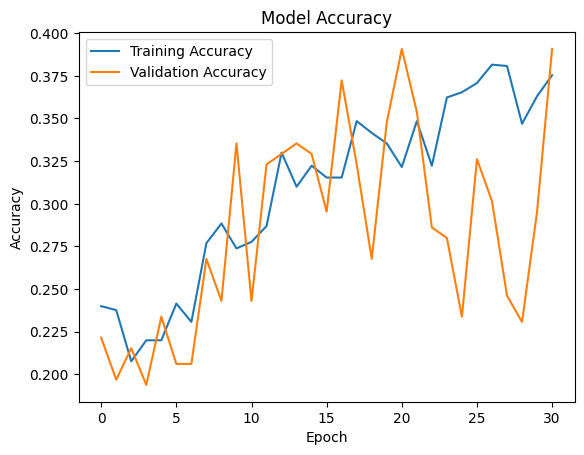

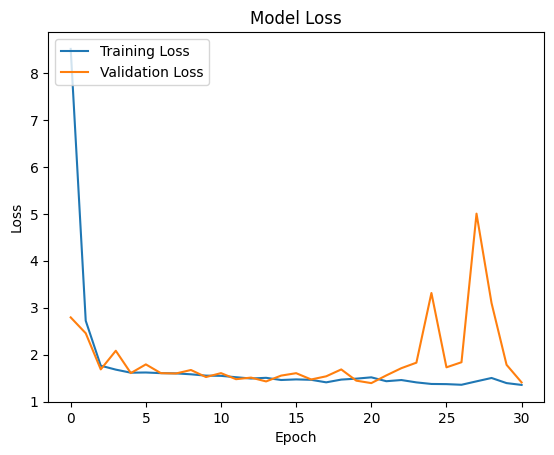

In [24]:
model.evaluate(validation_generator)

# Trainingsergebnisse plotten
import matplotlib.pyplot as plt

# Plot für die Genauigkeit
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot für den Verlust
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## Manuelle Validation 

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


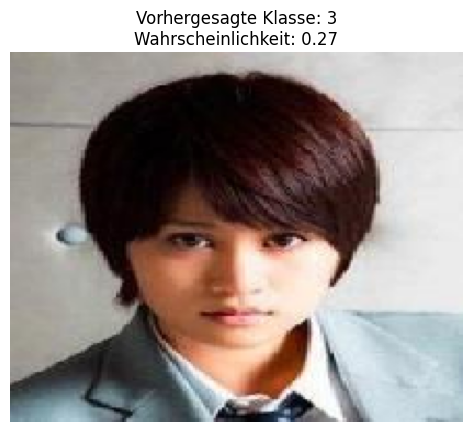

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


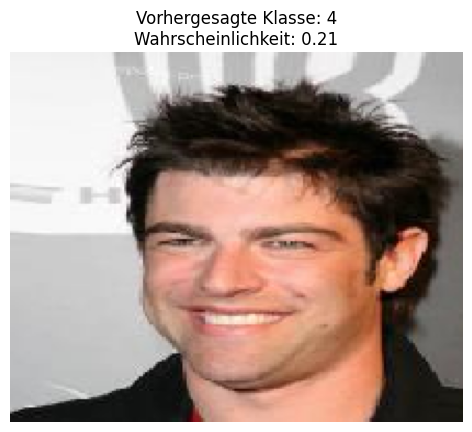

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


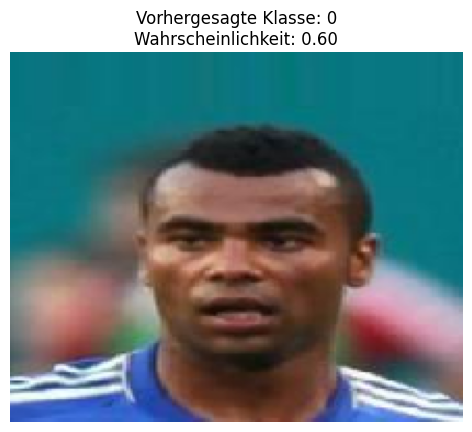

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


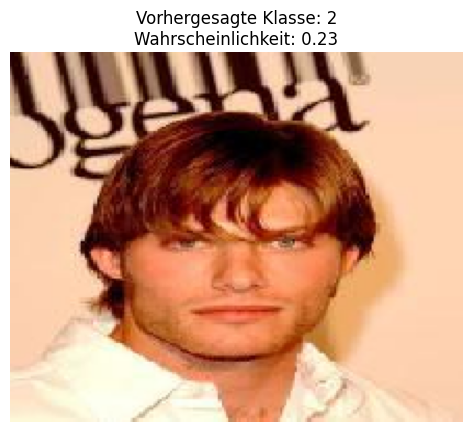

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


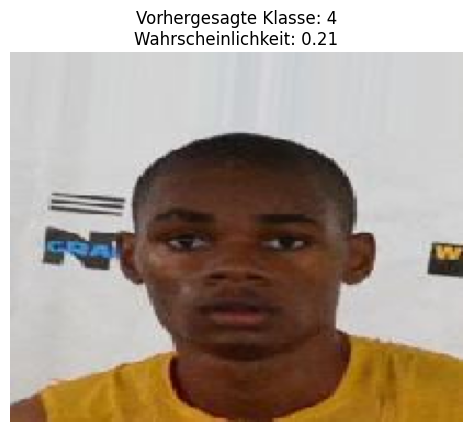

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


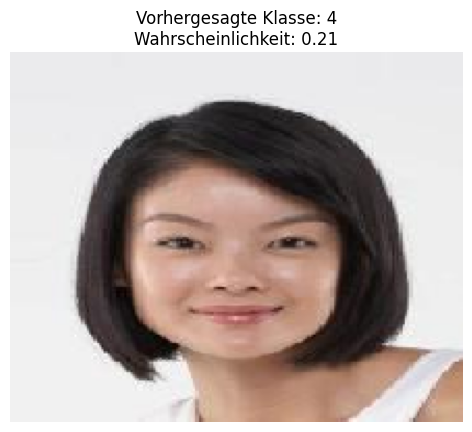

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


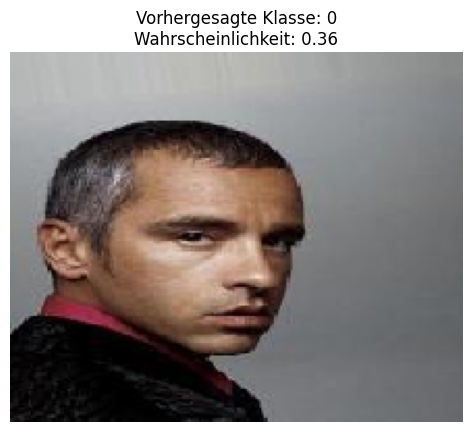

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


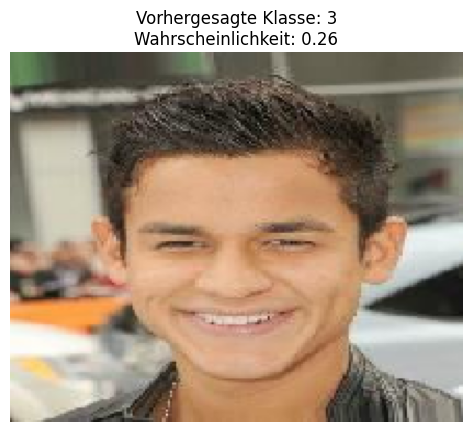

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


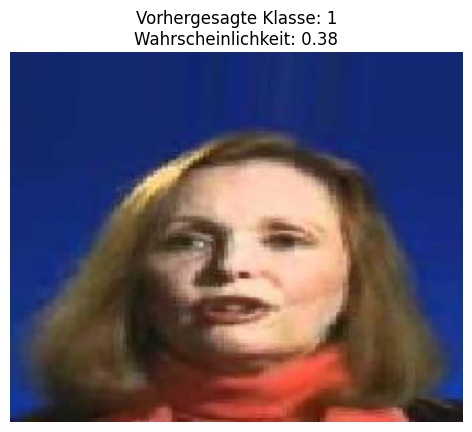

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


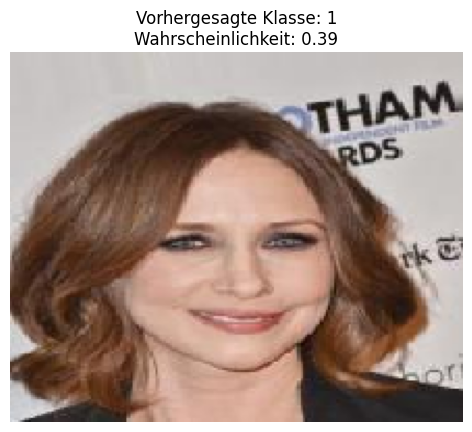

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


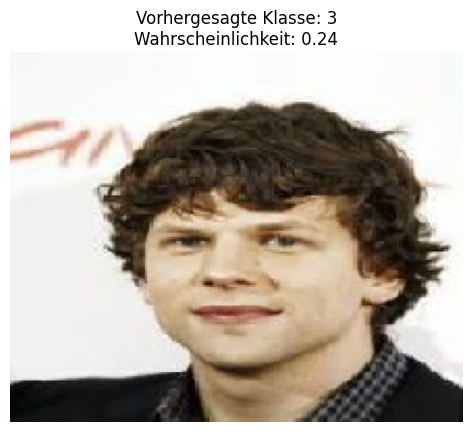

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


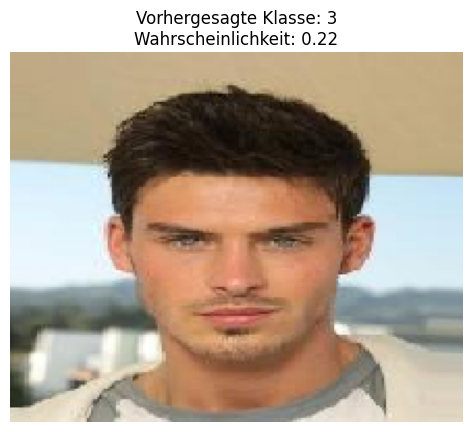

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


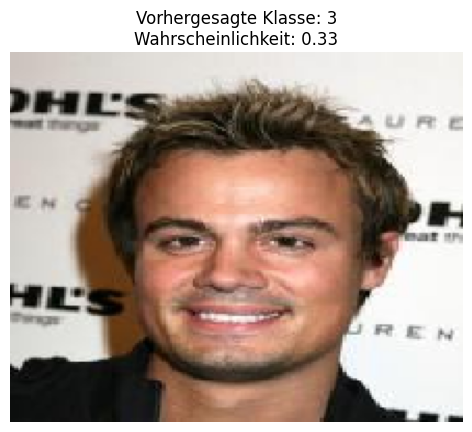

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


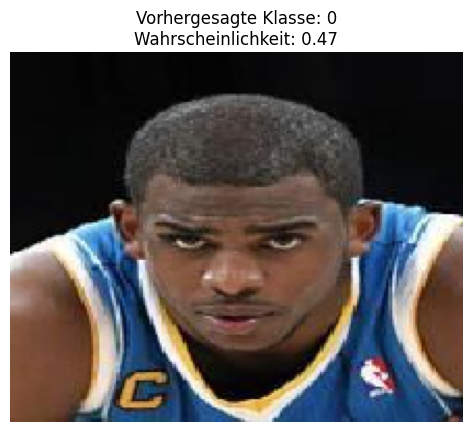

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


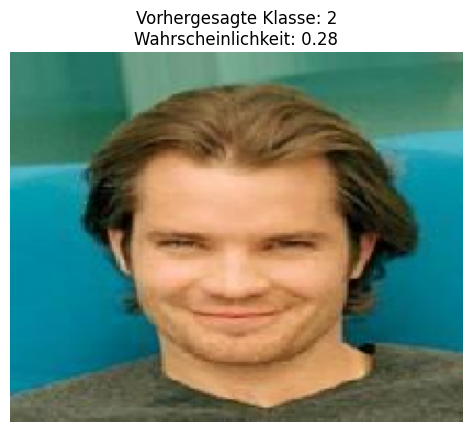

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


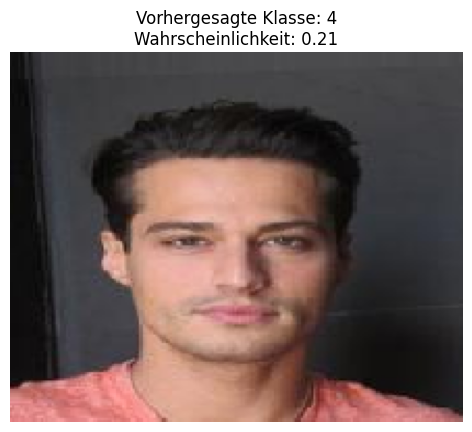

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


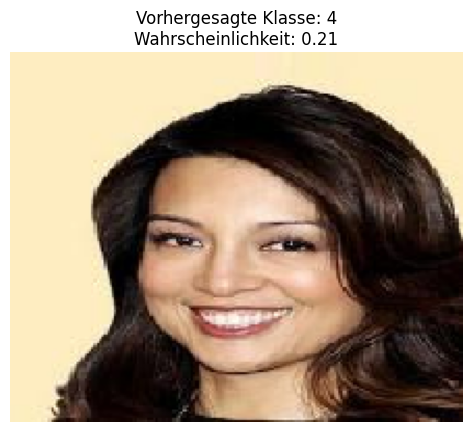

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


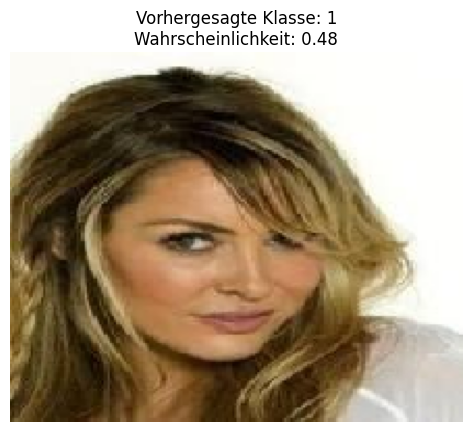

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


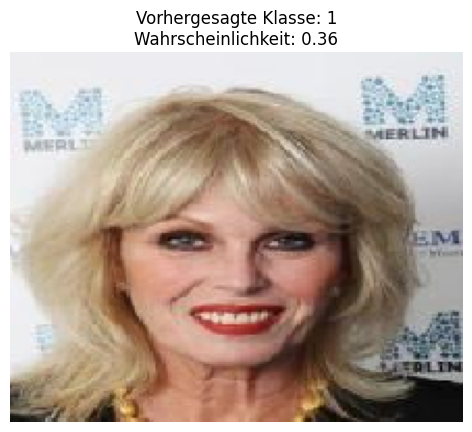

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


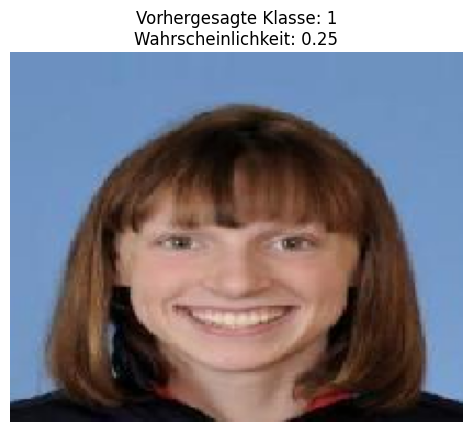

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


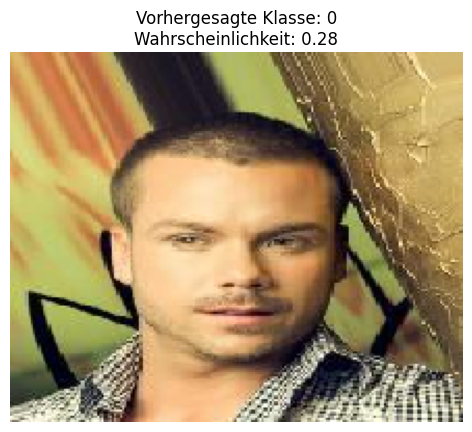

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


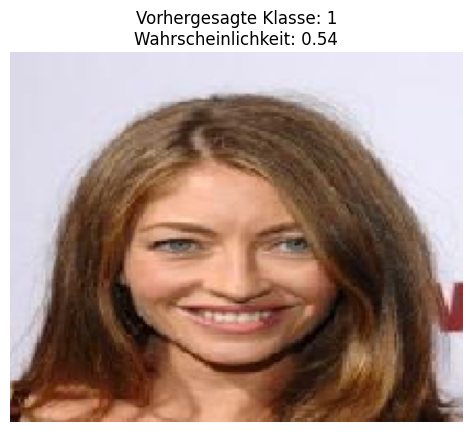

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


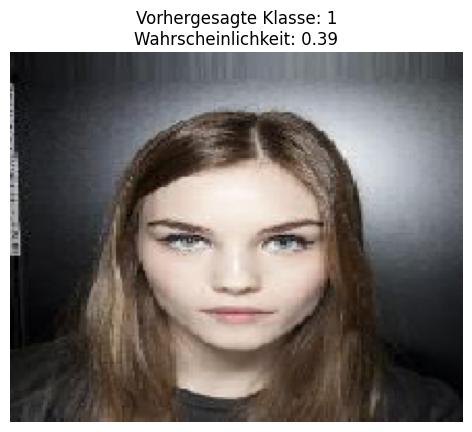

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


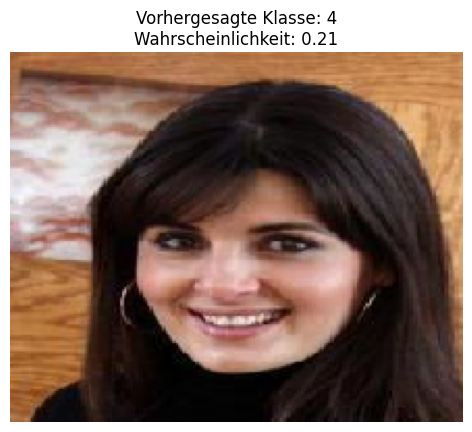

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


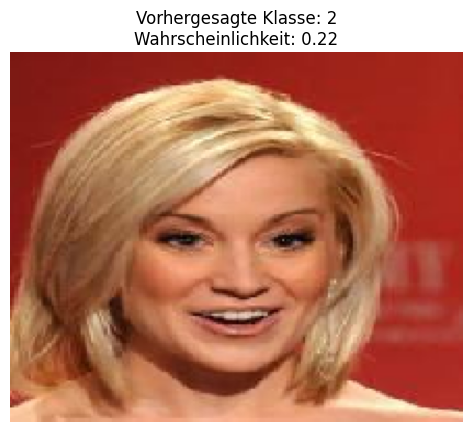

In [27]:
# Pfad zum Ordner mit den Testbildern
test_image_folder = '/home/patrick/Dokumente/Datageneration/dataset/test_dataset'

# Geladenes Modell
model = load_model('325.keras')

# Bildgröße, die das Modell erwartet
img_height, img_width = 178, 218
def predict_image_class(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisierung

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    probability = np.max(predictions)
    return predicted_class[0], probability
# Durchlaufe alle Bilder im Ordner und zeige die Vorhersagen an
for img_file in os.listdir(test_image_folder):
    img_path = os.path.join(test_image_folder, img_file)
    if img_path.endswith(('.png', '.jpg', '.jpeg')):
        predicted_class, probability = predict_image_class(img_path)
        # Bild anzeigen
        img = image.load_img(img_path, target_size=(img_height, img_width))
        plt.imshow(img)
        plt.title(f'Vorhergesagte Klasse: {predicted_class}\nWahrscheinlichkeit: {probability:.2f}')
        plt.axis('off')
        plt.show()